# Probability vs. Statistics

Probability and statistics are two related but distinct mathematical disciplines.

Probability is a branch of mathematics that deals with the analysis of random phenomena. It's concerned with predicting the likelihood of future events based on known outcomes. Probability theory is used to create models that can help predict a wide range of phenomena, from the outcomes of casino games to the behavior of molecules in a gas. Probability is fundamentally a theoretical subject, and its concepts and principles are used as a foundation for statistics.

Statistics, on the other hand, is the study of how to collect, analyze, interpret, present, and organize data. It's about extracting meaningful insights from raw information and making decisions based on those insights. In other words, statistics is the practice of turning data into knowledge. Statistics can be divided into two major areas: descriptive statistics, which involves organizing and summarizing data, and inferential statistics, which involves drawing conclusions and making predictions about a population based on a sample of data from that population.

# Confidence intervals



A confidence interval is a range where we expect a certain value to fall a certain percentage of the time.

### Confidence interval for a mean

Let's say you're trying to figure out the average height of all the people in your city. It's not feasible to measure everyone, so you take a random sample of people and measure their heights. From this sample, you calculate an average height.

But you know that if you took a different sample, you'd get a slightly different average. So you calculate a range (the confidence interval) around the average you calculated. This range estimates where the true average height for all people in your city (your population) lies.

If your confidence interval is 95%, it means that if you were to repeat your sampling over and over, 95% of the time the true average height would fall within your calculated range. It gives you a way to express how confident you are that your sample average is close to the true average for the population.

$$CI = \bar{X} \pm Z \left(\frac{\sigma}{\sqrt{n}}\right)$$
$$Z = \frac{X - \mu}{\sigma}$$

Where:

- $\bar{X}$ is the sample mean,
- $Z$ is the Z-score,
- $X$ is the value of the element,
- $μ$ is the population mean,
- $σ$ is the standard deviation.

The formula above is used when you know the standard deviation of the population. If you don't know the standard deviation of the population, you can use the standard deviation of your sample ($s$) as an estimate, and use a t-score ($t$) instead of a Z-score.

The formula in this case would be:

$$CI = \bar{X} \pm t \left(\frac{s}{\sqrt{n}}\right)$$

However, for our examples, we are assuming that our samples are large enough (generally > 30 is taken as a threshold), so the Central Limit Theorem applies and normality can be safely assumed; if sample sizes are smaller, a safer approach is to use a $t$-distribution.

## Exercise 1
### Confidence interval for a proportion

Suppose you are a data scientist at a web company. The company has recently introduced a new design for its website. You are interested in estimating the proportion of users who find the new design appealing.

You decide to conduct a survey. Out of a random sample of 500 users, 315 said they found the new design appealing.

1. Calculate the point estimate of the proportion of users who find the new design appealing.
2. Calculate a 95% confidence interval for this proportion.
3. Interpret the confidence interval in the context of the problem.
4. Let's say that instead of 500 sampled users, which is very small in real life, we sampled 5000 users and 3150 of them said they found the new design appealing. How would that affect our results? Explain your answer.

### Solution

**1. Calculate the point estimate of the proportion of users who find the new design appealing.**

The point estimate for the proportion is simply the sample proportion, which is calculated as the number of successful outcomes (users who find the design appealing) divided by the total number of outcomes (total users surveyed).

In this case, the point estimate $\hat{p}$ is calculated as:

$$\hat{p} = \frac{\text{number of successful outcomes}}{\text{total number of outcomes}}$$

So, we have:

$$\hat{p} = \frac{315}{500} = 0.63$$

So, the point estimate for the proportion of users who find the new design appealing is 0.63, or 63%.

**2. Calculate a 95% confidence interval for this proportion.**

The formula for a confidence interval for a proportion is:

$$CI = \hat{p} \pm Z \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$$

Where:

- $\hat{p}$ is the sample proportion (calculated in step 1)
- $Z$ is the Z-score that corresponds to your desired level of confidence
- $n$ is the sample size

For a 95% confidence level, $Z$ is approximately 1.96.

Plugging in the numbers, we get:

$$0.63 \pm 1.96 \sqrt{\frac{0.63(1-0.63)}{500}}$$

Solving the equation inside the square root first:

$$0.63 \times (1 - 0.63) = 0.2331$$

$$\frac{0.2331}{500} = 0.0004662$$

$$\sqrt{0.0004662} = 0.0216$$

Then multiply by the Z-score and calculate the interval:

$$1.96 \times 0.0216 = 0.0423$$

So, the 95% confidence interval is $(0.63 - 0.0423, 0.63 + 0.0423)$, which simplifies to $(0.5877, 0.6723)$.

**Note**: In a normal distribution, it's often said that about 95% of the data falls within 2 standard deviations of the mean. This is a simplification and is easy to remember, which makes it useful for providing a quick, intuitive understanding of the normal distribution.

However, the precise value, based on the properties of the standard normal distribution, is closer to 1.96 standard deviations for a 95% confidence interval. When calculating confidence intervals, we typically use this more precise value to get a more accurate result.

So, while saying "2 standard deviations" is a good rule of thumb and can be useful in many situations, when performing statistical calculations like constructing confidence intervals, it's better to use the more precise Z-score of 1.96 for a 95% confidence level.

**3. Interpret the confidence interval in the context of the problem.**

The interpretation of a 95% confidence interval is that we are 95% confident that the true proportion of all users who find the new design appealing is between 58.77% and 67.23%. This means that if we were to repeat this survey many times, 95% of the intervals calculated in this way would contain the true proportion of users who find the design appealing.

**4. Let's say that instead of 500 sampled users, which is very small in real life, we sampled 5000 users and 3150 of them said they found the new design appealing. How would that affect our results? Explain your answer.**

In that case, the point estimate for the proportion would be exactly the same because both number of successful outcomes and total number of outcomes are 10 times bigger, so the proportion is the same.

However, looking at ther formula, we can say that the confidence interval would be tighter because n is bigger. Which means that, in repeated surveys, the point estimate of the proportion would have to fall in a more precise (i.e. smaller) interval for us to be 95% confident that the true proportion of all users lies within that interval.

## Let's python!

In [1]:
import math
import scipy.stats as stats

# number of customers who rated the design as "Appealing"
x = 315

# total number of customers who rated the design
n = 500

# calculate the point estimate
p_hat = x / n

# calculate the standard error
se = math.sqrt((p_hat * (1 - p_hat)) / n)

# calculate the margin of error
z = stats.norm.ppf(0.975)

# ppf is the percent point function (inverse of cdf (cumulative distribution function) — percentiles).
# It is the value of the variable corresponding to a given percentile from the distribution.


# if we were to use t-score
# t = stats.t.ppf(0.975, n-1)  # T-score for 95% confidence

me = z * se

# calculate the confidence interval
ci_lower = p_hat - me
ci_upper = p_hat + me

print(f"Z-score is {z}")
print(f"The 95% confidence interval is ({ci_lower:.10f}, {ci_upper:.10f})")

Z-score is 1.959963984540054
The 95% confidence interval is (0.5876811141, 0.6723188859)


## Exercise 2

Confidence Interval for Average Daily Screen Time

A recent study was conducted to estimate the average daily screen time for adults. A random sample of 100 adults was selected, and each person was asked to record their screen time for a week. The sample mean screen time was found to be 5.5 hours with a standard deviation of 1.5 hours.

Your task is to calculate a 95% confidence interval for the average daily screen time for all adults.

### Solution

**Step 1**: Identify a sample statistic. Since we are trying to estimate a population mean, we choose the sample mean (5.5 hours) as the sample statistic.

**Step 2**: Select a confidence level. In this analysis, the confidence level is defined for us in the problem. We are working with a 95% confidence level.

**Step 3**: Find the standard deviation or standard error. Since we do not know the standard deviation of the population, we cannot compute the standard deviation of the sample mean. Instead, we compute the standard error (SE).

$$SE = \frac{s}{\sqrt{n}} = \frac{1.5}{\sqrt{100}} = 0.15$$

**Step 4**: Find the margin of error. The key steps are shown below:

Find standard deviation or standard error. We've already calculated the standard error as 0.15.  
Find Z-score. For a 95% confidence level, the Z-score is approximately 1.96.  
Multiply Z-score by standard error to find the margin of error

$$Margin\ of\ Error = Z \cdot SE = 1.96 \cdot 0.15 = 0.294$$

**Step 5**: Specify the confidence interval. The range of the confidence interval is defined by the sample statistic plus the margin of error. The uncertainty is denoted by the confidence level.

$$CI = \bar{X} \pm Margin\ of\ Error = 5.5 \pm 0.294$$

So, the 95% confidence interval for the average daily screen time for all adults is (5.5 - 0.294, 5.5 + 0.294) = (5.206, 5.794) hours.

This means we are 95% confident that the true population mean of the average daily screen time for all adults is between 5.206 hours and 5.794 hours.

## Let's python!

In [1]:
import math
import scipy.stats as stats

# sample mean
x_bar = 5.5

# sample standard deviation
s = 1.5

# sample size
n = 100

# calculate the standard error
se = s / math.sqrt(n)

# calculate the margin of error
z = stats.norm.ppf(0.975)  # Z-score for 95% confidence
me = z * se

# calculate the confidence interval
ci_lower = x_bar - me
ci_upper = x_bar + me

print(f"Z-score is {z}")
print(f"The Margin of Error is {me}")
print(f"The 95% confidence interval for the average daily screen time for all adults is ({ci_lower:.2f}, {ci_upper:.2f}) hours.")

Z-score is 1.959963984540054
The Margin of Error is 0.2939945976810081
The 95% confidence interval for the average daily screen time for all adults is (5.21, 5.79) hours.


# Hypothesis Testing

## Exercise 3

Let's say we have four siblings and they're trying to decide how to pick who should do the dishes every night. The oldest sibling, let's call him Bill, decides to put all of their names in a bag to be randomly picked every night and everyone agrees.

So they start. But after three nights, Bill has still not had to do the dishes. At that point, the other siblings are starting to suspect something is wrong. But what's the probability of that happening?

**Hypothesis**: Bill is not cheating.

For each event, there are 4 possible events. In 3 of them, Bill doesn't wash the dishes.

1st day:

$$P(Bill\ not\ picked) = \frac{3}{4}$$

3rd day:

$$P(Bill\ not\ picked) = \frac{3}{4} \cdot \frac{3}{4} \cdot \frac{3}{4} \cdot = \frac{27}{64} = 0.42$$
which is 42% and not unlikely.

12th day:

$$P(Bill\ not\ picked) = (\frac{3}{4})^{12} = 0.03$$
which is 3% and quite unlikely. That's the probability _if_ our hypothesis is true. To be able ro reject our fail to reject our hypothesis, we need a threshold.

## General Principle

### 1. Set our hypothesis, $H_0$ and $H_1$ (or $H_a$).

$H_0$: null hypothesis (usually, the baseline or what we can quantify, the hypothesys we really don't want to be wrong about)

$H_1$: alternative hypothesis

### 2. Pick a metric and compute it in the sample.

### 3. Find the distribution of the metric under $H_0$ if we assume $H_0$ is true (often a normal law, but can de different) and compare with the value we got in our sample (step 2).

### 4. Take a decision: reject $H_0$ or fail to reject $H_0$ (usually comparing with 5%).

## Exercise 4

A company claims that their new diet program helps people lose more than 10 pounds on average in a month. You are a skeptical consumer and decide to test this claim. You gather a random sample of 30 individuals who have completed the diet program and find that they have lost an average of 11 pounds. A statistical test gives a p-value of 0.03.

1. State the null and alternative hypotheses for this scenario.
2. If you use a significance level of 0.05, what is your conclusion? Do you reject the null hypothesis or fail to reject it? Why?
3. If you use a significance level of 0.01, what is your conclusion? Do you reject the null hypothesis or fail to reject it? Why?
4. What does the p-value of 0.03 mean in the context of this scenario?

### Solution

**1. State the null and alternative hypotheses for this scenario.**

The null hypothesis ($H_0$) is that the average weight loss is 10 pounds or less.  
The alternative hypothesis ($H_1$) is that the average weight loss is more than 10 pounds.

In mathematical terms:

$H_0: μ ≤ 10$

$H_1: μ > 10$

where $μ$ is the population mean weight loss.

This exercise is an example of a one-sample, one-sided hypothesis test. The null hypothesis is that the average weight loss is 10 pounds or less, and the alternative hypothesis is that the average weight loss is more than 10 pounds.

**2. If you use a significance level of 0.05, what is your conclusion? Do you reject the null hypothesis or fail to reject it? Why?**

The p-value (0.03) is less than the significance level (0.05), so you reject the null hypothesis. This suggests that the diet program does help people lose more than 10 pounds on average in a month.

A p-value of 0.03 means that if the null hypothesis is true (i.e., the true average weight loss is 10 pounds or less), there is a 3% chance of observing a sample mean of 11 pounds or more.

**3. If you use a significance level of 0.01, what is your conclusion? Do you reject the null hypothesis or fail to reject it? Why?**

The p-value (0.03) is greater than the significance level (0.01), so you fail to reject the null hypothesis. This means that, at this higher standard of evidence, you do not have strong enough evidence to conclude that the diet program helps people lose more than 10 pounds on average in a month.

**4. What does the p-value of 0.03 mean in the context of this scenario?**

The p-value of 0.03 means that, assuming the null hypothesis is true (i.e., the true average weight loss is 10 pounds or less), there is a 3% chance of observing a sample mean of 11 pounds or more.

In this case, if the p-value is less than the significance level, we reject the null hypothesis. If the p-value is greater than the significance level, we fail to reject the null hypothesis.

## Exercise 5

Anna read an article that said 6% of teenagers were vegetarians, but she thinks it's higher for students at her large school. To test her theory, Anna took a random sample of 25 students at her school, and 20% of them were vegetarians.

To see how likely a sample like this was to happen by random chance alone, Anna performed a simulation. She simulated 40 samples o $n = 25$ students from a large population where $6\%$ of the students were vegetarian. She recorded the proportion of vegetarians in each sample. Here are the sample proportions from her 40 samples:

$$Simulated\ sample\ proportions$$

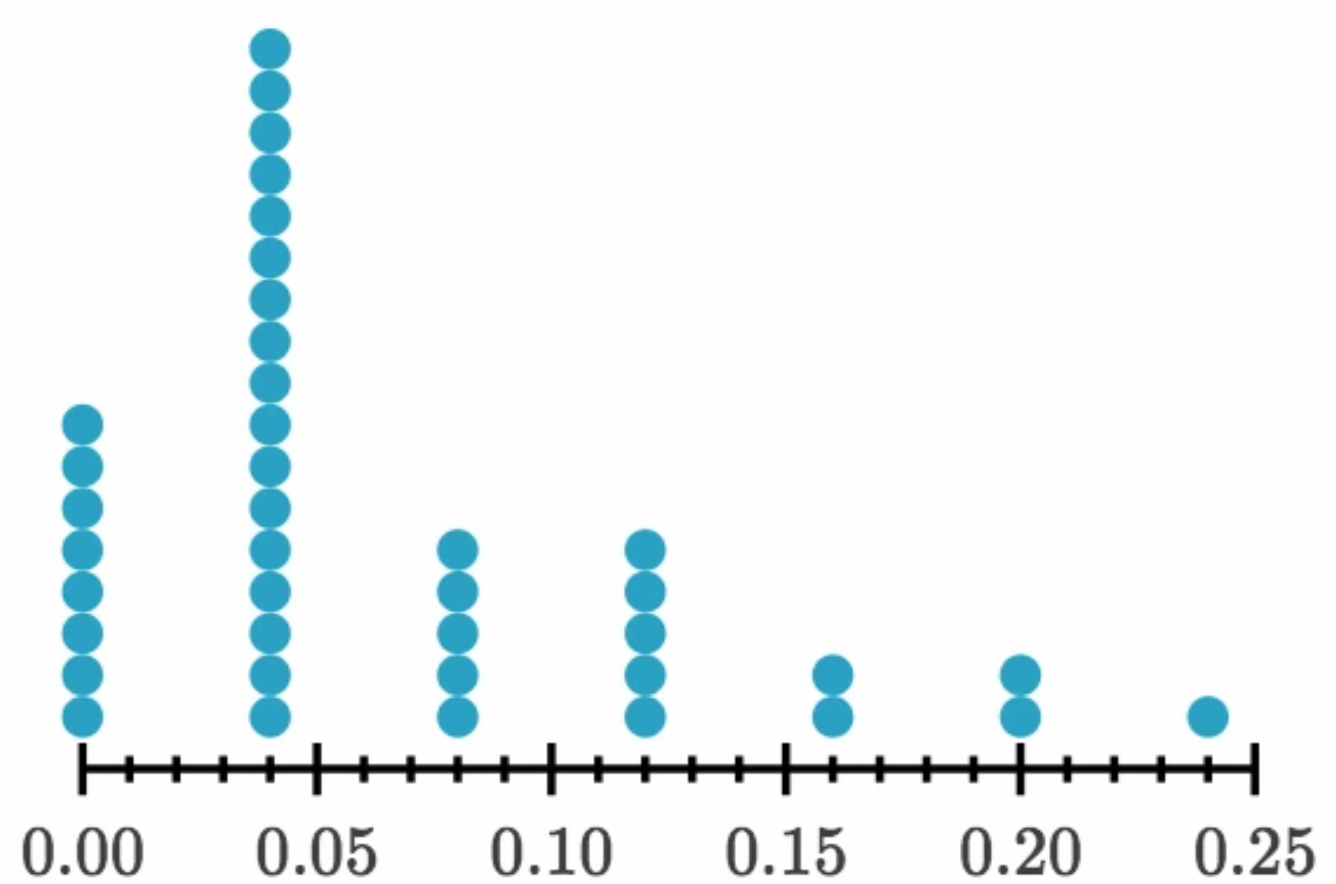

Anna wants to test $H_0: p = 6\%$ vs. $H_1: p > 6\%$ where $p$ is the true proportion of students who are vegetarian at her school.

Based on these simulated results, what is the approximate $p$-value of the test?

Note: The sample result was $\hat{p} = 20\%$.

### Solution

From the first paragraph, we can take the true population proportion. If we believe this article of teenagers who are vegetarians, we could say that:

$$p = 6\%$$

Now for the school, that's our null hypothesis. The hypothesis that the proportion of teenagers who are vegetarians would be the same as the proportion of the teenagers as a whole. But Anna suspects that's not the case, she thinks that the true population parameter for the school is greater than 6%. So that's our alternative hypothesis.

$$H_0: P_{school} = 6\%$$
$$H_a: P_{school} > 6\%$$

And so, to see whether or not we could reject the null hypothesis, we take a sample, and that's exactly what Anna did. She took a random sample of 25 students and calculated the sample proportion. And 20% of them were vegetarians. But does that mean her suspicion is right? How likely is it to get a sample proporion this high or grater, assuming our $H_0$ is true? That probability is the $p$-value. And if it's lower than a threshold, then we will reject our null hypothesis, because it means that the chance of it happening (as it happened in our sample) is to small, suggesting that $H_0$ is not true after all.

In other words, the p-value is equal to the probability that your sample proportion, as she's doing this for students at her school, is going to be greater than or equal to 20% if you assumed that your null hypothesis was true.


$$ p-value = P(\hat{p}_{school} \geq 20\%\ |\ H_0 true)$$

So if we assumed that the true proportion at the school was 6% of vegetarians, but we took a sample of 25 students where we got 20%, what is the probability of getting 20% or greater for a sample of 25? There's where we take the simulation. To see how likely a sample like this
was to happen by random chance alone, Anna simulated 40 samples of $n$ equals to 25 students from a large population where 6% of the students were vegetarian. She recorded the proportion of vegetarians in each sample. The sample proportions from her 40 samples are shown in the picture above.

So what she's doing here with the simulation, this is an approximation of the sampling distribution of the sample proportions if you we're to assume that our null hypothesis is true. And it says, Anna wants to test her null hypothesis
which is that the true proportion at her school is 6% versus the alternative hypothesis that the true proportion at her school is greater than 6% where $p$ is the true proportion of students who are vegetarian at her school.

And here's actually the question being asked: Based on these simulated results, what is the approximate $p-value$ of the test?

If we assumed that this is a reasonably good approximation of our sampling distribution of our sample proportions, there's 40 data points, in how many of these samples do we get a sample proportion that is greater than or equal to 20%?

Looking at the picture, we can see that there are 3 of them that meet this constraint. So we have 3 out of 40.

And there we have it:

$$p-value \approx \frac{3}{40} \approx 0.075 \approx 7.5\%$$

**Additional comment**: That was not the question, but let's say that, from the beginning, we had a significance level of 5%, like we usually do. That would mean that a p-value of 7.5% (i.e. the probability of a sample proportion picked at random to be equal or greater than 20%, given that $H_0$ is true) is a big enough chance, so we would _fail_ to reject the null hypothesis. We could not say that the proportion at school is bigger than 6%, even if in one sample it is.












